In [5]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("./../Dataset/Nutrient Composition Dataset.csv")

In [7]:
df.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include..."
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned"


In [4]:
df.iloc[:,1:6].describe().T

,count,mean,std,min,25%,50%,75%,max
Protein,1746.0,0.922470,0.627128,0.000128,0.435853,0.813025,1.295106,4.016890
Fat,1746.0,0.900091,0.634617,0.000267,0.394784,0.804687,1.298988,3.979364
vitaminC,1746.0,0.900146,0.623847,0.000029,0.419103,0.796290,1.280870,4.013322
Fibre,1746.0,0.900830,0.626875,0.002579,0.389124,0.820783,1.295732,3.570331


In [5]:
data = df.iloc[:,1:5]

In [6]:
data.head()

,Protein,Fat,vitaminC,Fibre
0,0.452369,1.170926,1.079271,1.702960
1,2.321087,0.706856,0.350088,0.658249
2,0.884554,1.186571,2.428544,1.984562
3,0.715501,0.577599,0.270925,0.369266
4,0.132610,0.544521,0.116884,0.557309


In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [8]:
wardlink = linkage(data, method='ward')

In [9]:
wardlink

array([[3.12000000e+02, 1.06100000e+03, 2.41103755e-02, 2.00000000e+00],
       [6.72000000e+02, 1.06600000e+03, 3.50400283e-02, 2.00000000e+00],
       [1.77000000e+02, 1.54900000e+03, 4.09211042e-02, 2.00000000e+00],
       ...,
       [3.48400000e+03, 3.48600000e+03, 1.96940113e+01, 1.04000000e+03],
       [3.48200000e+03, 3.48700000e+03, 2.76332047e+01, 7.06000000e+02],
       [3.48800000e+03, 3.48900000e+03, 3.30525698e+01, 1.74600000e+03]])

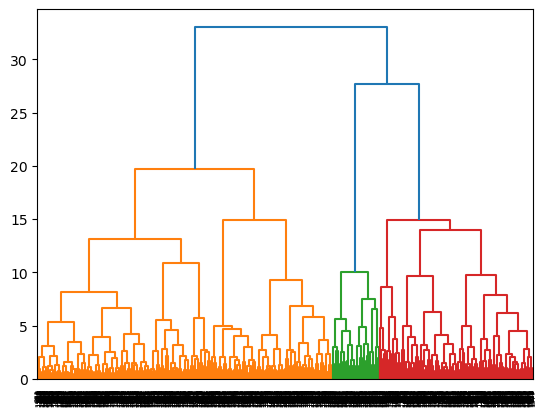

In [10]:
dend = dendrogram(wardlink)

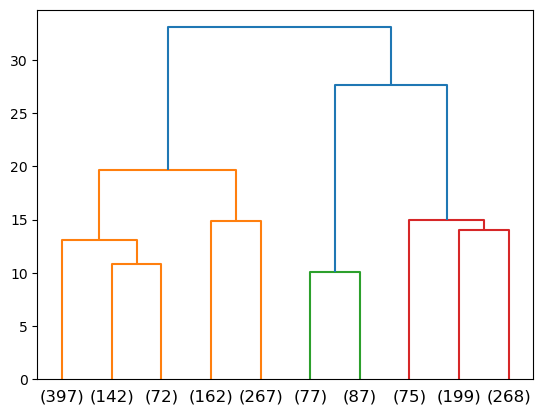

In [11]:
dend = dendrogram(wardlink,
                  truncate_mode='lastp',
                  p = 10,
                 )

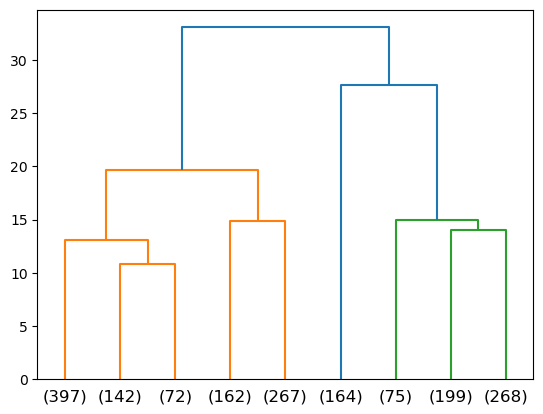

In [12]:
dend = dendrogram(wardlink,
                  truncate_mode='lastp',
                  p = 9,
                 )

In [28]:
from scipy.cluster.hierarchy import fcluster

In [30]:
clusters_maxclust = fcluster(wardlink, 3, criterion='maxclust')
clusters_maxclust

array([1, 1, 2, ..., 1, 1, 3], dtype=int32)

tells the cluster no. in which all our points should go

In [33]:
clusters_dis = fcluster(wardlink, 24, criterion='distance')
clusters_dis

array([1, 1, 2, ..., 1, 1, 3], dtype=int32)

In [35]:
data['H_Clus'] = clusters_maxclust

In [41]:
data.head(11)

,Protein,Fat,vitaminC,Fibre,H_Clus
0,0.452369,1.170926,1.079271,1.702960,1
1,2.321087,0.706856,0.350088,0.658249,1
2,0.884554,1.186571,2.428544,1.984562,2
3,0.715501,0.577599,0.270925,0.369266,1
4,0.132610,0.544521,0.116884,0.557309,1
5,1.267150,0.234292,0.546766,0.386447,1
6,0.351557,0.677176,0.551181,1.102799,1
7,0.635325,1.223652,0.330483,0.675459,3
8,0.527588,1.250053,1.247867,0.889896,1
9,0.598690,0.068307,1.423195,0.339158,1


### K-Means

starts with initial assumption that how many clusters do we want

In [45]:
from sklearn.cluster import KMeans

In [49]:
k_means = KMeans(n_clusters=8)

In [51]:
k_means.fit(data)

C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


KMeans()

In [63]:
k_means.labels_

array([0, 3, 4, ..., 5, 5, 1])

In [80]:
k_means = KMeans(n_clusters=6)
k_means.fit(data)
k_means.labels_
k_means.inertia_

C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


1319.9298879275302

In [78]:
Inertia = []

In [82]:
for i in range(2, 16):
    k_means = KMeans(n_clusters=i)
    k_means.fit(data)
    Inertia.append(k_means.inertia_)

C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

In [86]:
len(Inertia)

14

In [88]:
Inertia

[2306.26874283359,
 1811.2620896021951,
 1653.6757490466262,
 1463.9730734596833,
 1366.993692372514,
 1220.210376404079,
 1164.8016907470594,
 1075.6542619685206,
 1037.7684599829317,
 973.7849403474208,
 942.4172368450759,
 898.5152933493076,
 852.4269297615518,
 819.9771345542522]

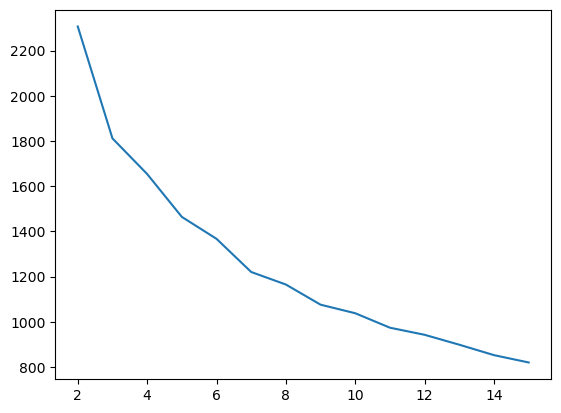

In [90]:
plt.plot(range(2, 16), Inertia)

In [92]:
KM_i = {}

for i in [3, 5, 11]:
    k_means = KMeans(n_clusters=i)
    k_means.fit(data)
    KM_i[i] = k_means.inertia_

C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [94]:
KM_i

{3: 1805.3876211331435, 5: 1444.2698058867943, 11: 987.8840066485786}

In [147]:
KM_3 = KMeans(n_clusters=3)
KM_3.fit(data)

KM_5 = KMeans(n_clusters=5)
KM_5.fit(data)

KM_11 = KMeans(n_clusters=11)
KM_11.fit(data)

C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\laptop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


KMeans(n_clusters=11)

### DBSCAN

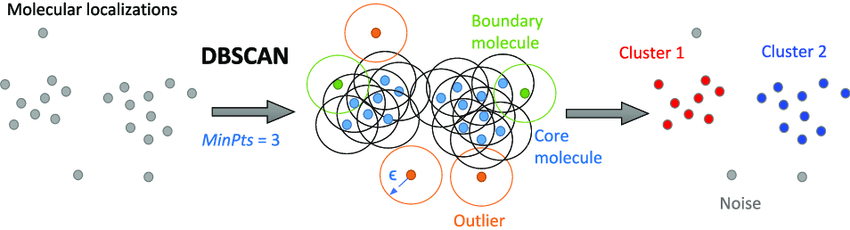

In [105]:
from sklearn.cluster import DBSCAN

In [107]:
db = DBSCAN(min_samples=5, eps=0.5)

In [133]:
DB_CLus = db.fit_predict(data)

In [137]:
DB_CLus

array([0, 0, 1, ..., 0, 0, 2], dtype=int64)

In [135]:
len(db.labels_)

1746

In [129]:
print(set(db.labels_))

{0, 1, 2, 3, -1}


In [143]:
data['DB_Clus'] = DB_CLus

In [153]:
data['KM_3_Clus'] = KM_3.labels_

In [157]:
data

,Protein,Fat,vitaminC,Fibre,H_Clus,DB_Clus,KM_3_Clus
0,0.452369,1.170926,1.079271,1.702960,1,0,0
1,2.321087,0.706856,0.350088,0.658249,1,0,0
2,0.884554,1.186571,2.428544,1.984562,2,1,2
3,0.715501,0.577599,0.270925,0.369266,1,0,0
4,0.132610,0.544521,0.116884,0.557309,1,0,0
...,...,...,...,...,...,...,...
1741,1.188371,1.963861,1.144457,1.438795,3,2,1
1742,2.325762,1.970995,1.352002,0.051109,3,2,1
1743,0.597130,0.727934,1.031587,0.255496,1,0,0
1744,0.748026,1.722406,1.319929,0.920391,1,0,0


In [159]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [183]:
HC_sil_width = silhouette_samples(data, clusters_maxclust)  # HC - Hierarchial_CLustering

In [185]:
HC_sil_width

array([0.50485828, 0.44522822, 0.46380576, ..., 0.68087028, 0.49453644,
       0.39005357])

In [191]:
HC_sil_width.mean()

0.5258996753986472

In [175]:
KM3_sil_width = silhouette_samples(data, KM_3.labels_)
KM3_sil_width.mean()

0.5682722843879978

In [177]:
KM5_sil_width = silhouette_samples(data, KM_5.labels_)
KM5_sil_width.mean()

0.34069529751670374

In [179]:
KM11_sil_width = silhouette_samples(data, KM_11.labels_)
KM11_sil_width.mean()

0.22988055488632722

In [181]:
DB_sil_width = silhouette_samples(data, DB_CLus)
DB_sil_width.mean()

0.5171215461048901

In [197]:
DB = DBSCAN(min_samples=5, eps=1.6)
DB_CLus = DB.fit_predict(data)
DB_sil_width = silhouette_samples(data, DB_CLus)
DB_sil_width.mean()

0.5682722843879978

In [199]:
KM3_sil_width.mean() == DB_sil_width.mean()

True

### Support Vector

In [3]:
from sklearn.svm import SVC

In [11]:
SVM = SVC(kernel='rbf')

In [ ]:
SVM.fit(X_trai)